In [28]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('../data/bikeshare.csv',
                 index_col='datetime',
                 parse_dates = True)

In [9]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


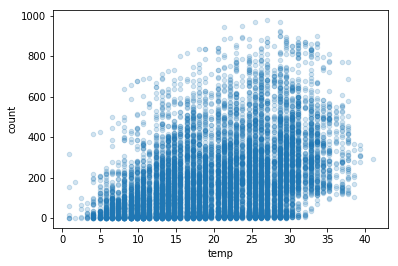

In [14]:
df.plot(kind='scatter',
        x='temp',
        y='count',
        alpha = 0.2);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


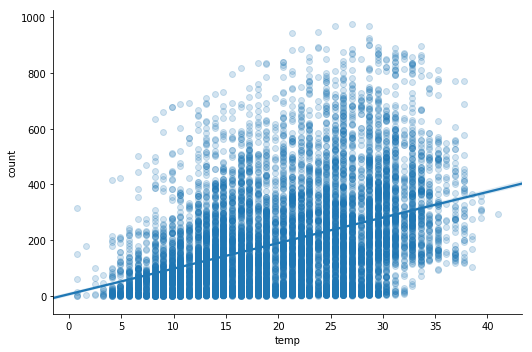

In [16]:
sns.lmplot(x='temp',
           y='count',
           data=df,
           aspect=1.5,
           scatter_kws={'alpha':0.2});

In [54]:
# feature_cols = ['temp']
X = df[feature_cols]
y = df['count']

In [21]:
X.shape

(10886, 1)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lr.intercept_

6.04621295961681

In [26]:
lr.coef_

array([9.17054048])

In [39]:
lr.predict(np.array([2]).reshape(1,-1))

array([24.38729392])

In [42]:
lr.predict(np.array([0,2,4,6,8,10]).reshape(6,-1))

array([ 6.04621296, 24.38729392, 42.72837489, 61.06945585, 79.41053681,
       97.75161777])

In [43]:
lr.predict(np.array([25]).reshape(1,-1))

array([235.309725])

In [44]:
df['tempF'] = df['temp'] * 1.8 + 32

In [46]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempF
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


In [53]:
feature_cols = ['tempF']

In [55]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lr.intercept_

-156.98561782129428

In [57]:
lr.coef_

array([5.09474471])

In [58]:
25 * 1.8 + 32

77.0

In [59]:
lr.predict(np.array([77]).reshape(1,-1))

array([235.309725])

In [61]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [63]:
df.drop('tempF',axis = 1, inplace=True)

In [64]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [75]:
feature_cols = ['temp', 'season', 'humidity', 'weather']
X = df[feature_cols]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


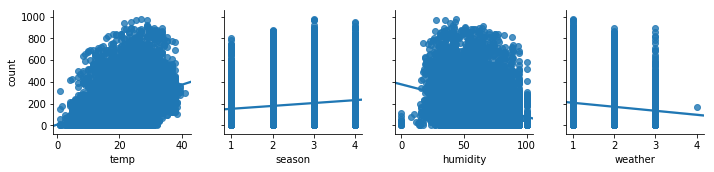

In [76]:
sns.pairplot(df, x_vars=feature_cols,y_vars='count', kind='reg');

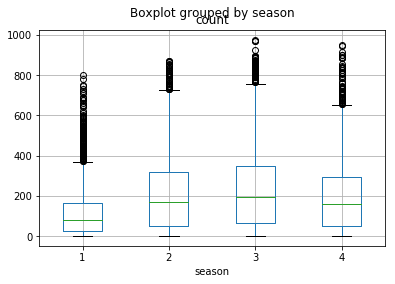

In [77]:
df.boxplot(column='count', by = 'season');

In [78]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.intercept_

159.52068786129786

In [80]:
lr.coef_

array([ 7.86482499, 22.53875753, -3.11887338,  6.67030204])

In [84]:
lr.score(X, y)

0.25829758327282126